In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Xử lí dữ liệu đầu vào

In [37]:
# import dữ liệu
df= pd.read_csv("cars.csv")
df.head()

,Price,miles(000),age,miles,year,model
0,15500,24.000,4,24000,2013,Ex-L
1,14000,4.800,3,4800,2014,Ex-L
2,13999,77.254,4,77254,2013,Ex-L
3,10900,40.000,9,40000,2008,Ex-L
4,10500,75.853,5,75853,2012,EX-T


In [38]:
df.isnull().sum()

Price         0
miles(000)    0
age           0
miles         0
year          0
model         0
dtype: int64

In [39]:
# Xóa cột miles
df = df.drop(columns=["miles(000)"])
df.tail()

,Price,age,miles,year,model
50,4950,12,145000,2005,DX
51,4200,13,132473,2004,DX
52,2500,18,200000,1999,DX
53,2500,14,122000,2003,DX
54,1000,20,196850,1997,DX


In [40]:
# lưu lại category của cột model
model_categories = df["model"].astype("category").cat.categories
# đổi dữ liệu cột model thành dạng số
df["model"] = df["model"].astype("category").cat.codes
df.tail()

,Price,age,miles,year,model
50,4950,12,145000,2005,0
51,4200,13,132473,2004,0
52,2500,18,200000,1999,0
53,2500,14,122000,2003,0
54,1000,20,196850,1997,0


# Tính hệ số tương quan + heatmap

In [41]:
df.corr()

,Price,age,miles,year,model
Price,1.000000,-0.857075,-0.890479,0.857075,0.571045
age,-0.857075,1.000000,0.779441,-1.000000,-0.603611
miles,-0.890479,0.779441,1.000000,-0.779441,-0.592755
year,0.857075,-1.000000,-0.779441,1.000000,0.603611
model,0.571045,-0.603611,-0.592755,0.603611,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

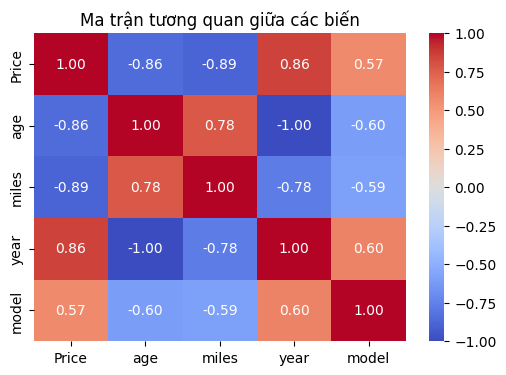

In [42]:
# Ve bang heatmap
plt.figure(figsize=(6,4))
sb.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan giữa các biến")
plt.show

# Xây dựng mô hình hqtt đa biến

In [ ]:
# khai báo mô hình
model = LinearRegression()
# khai báo biến độc lập và phụ thuộc
y= df["Price"]
X= df.drop(columns=["Price"])

In [44]:
# chia tập train : test (70/30)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=36)

In [45]:
# huấn luyện mô hình
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [46]:
y_pred = model.predict(X_test)

# Tính chỉ số MSE + R^2 (đánh gia mô hình)

In [47]:
mse = mean_squared_error(y_true = y_test, y_pred=y_pred)
r2 = model.score(X_test, y_pred)
r2_sklearn = r2_score(y_true=y_test, y_pred=y_pred)
print(f"MSE: {mse:.4f}")
print(f"R^2 (model.score): {r2:.4f}")
print(f"R^2 (r2_score): {r2_sklearn}")

MSE: 3797460.3187
R^2 (model.score): 1.0000
R^2 (r2_score): 0.8270071585181045
